## 1D Linear Advection Equation

$${\partial f \over \partial t} + v {\partial f \over \partial x} = 0$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lax_wendroff import Lax_Wendroff

### Set Grid and Initial Conditions

In [12]:
######## Set primary quantities : Number of grid-points, start/end of domain, velocity ########

N = 100
x_start = 0.
x_end = 1.
v = 1.0

######## Set secondary quantities : resolutions, grid centre etc ######## 

# Spatial resolution     
dx = (x_end - x_start) / N

# Actual simulation domain is slightly smaller for plotting purposes
x_a = x_start + 0.5 * dx
x_b = x_end - 0.5 * dx
xzn = np.linspace(x_a, x_b, N)

# Initial Conditions
u_initial = np.zeros(N)                   
a = 30 * int(N / 100)
x_left = a * dx
b = 70 * int(N / 100)
u_initial[a:b] = 1.0           

print("Number of grid points : ", N)
print("Grid Size :", dx)                           

Number of grid points :  100
Grid Size : 0.01


### Visualizing Initial Conditions

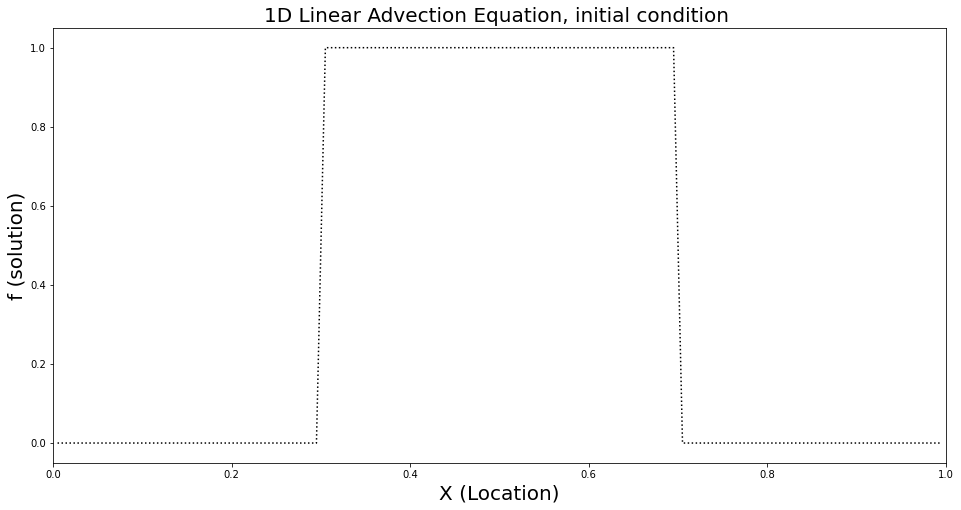

In [13]:
plt.figure(figsize=(16,8))
plt.title(f'1D Linear Advection Equation, initial condition ', fontsize=20)
plt.xlabel(f'X (Location)', fontsize=20)
plt.ylabel(f'f (solution)', fontsize=20)
plt.xlim(x_start, x_end)
plt.plot(xzn, u_initial,'k:', label="initial data")
plt.savefig('plots/classical_advection_initial.png')


### Integrate 1D advection equation and plot solution

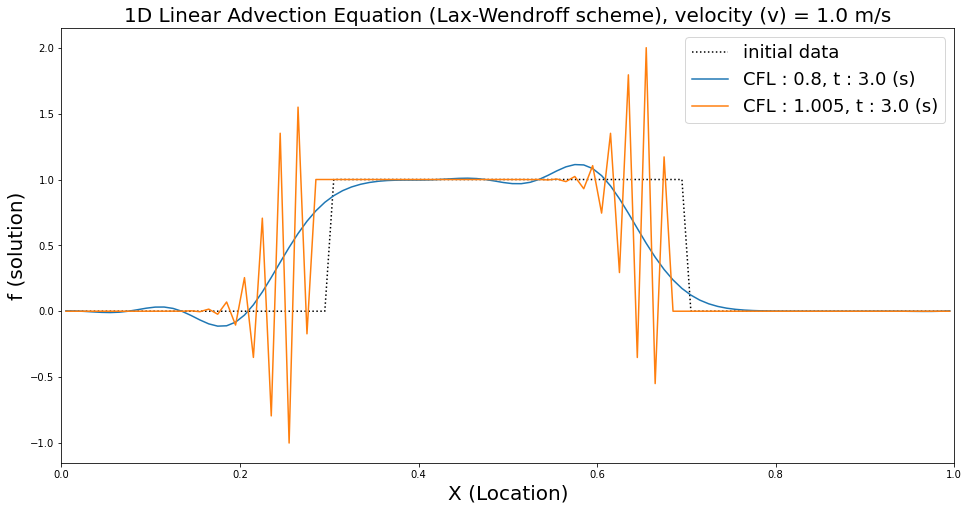

In [14]:
########### CFL Numbers for test ###########

cfl_list = [0.8, 1.005]

########### Plot Initial Condition ###########

plt.figure(figsize=(16,8))
plt.title(f'1D Linear Advection Equation (Lax-Wendroff scheme), velocity (v) = 1.0 m/s', fontsize=20)
plt.xlabel(f'X (Location)', fontsize=20)
plt.ylabel(f'f (solution)', fontsize=20)
plt.xlim(x_start, x_end)
plt.plot(xzn, u_initial,'k:', label="initial data")

########### Run the Finite Difference Scheme ###########

for cfl in cfl_list:
    dt = cfl * (dx / abs(v))           
    u = u_initial.copy()
    num_iterations = int(3 * N / cfl)                         
    for n in range(1, (num_iterations + 1)):                   
        u = Lax_Wendroff(u, v, dx, dt)
        if n == num_iterations:                                
            plt.plot(xzn, u, label=f"CFL : {cfl}, t : {np.ceil(n * dt)} (s)")
            nmax = np.argmax(u)
        plt.legend(loc="upper right", fontsize=18)

plt.savefig('plots/classical_advection.png')